# Linear, Ridge & Lasso Regression

In [1]:
# https://github.com/krishnaik06/RegressionandLasso/blob/master/Lassoand%20Regression.ipynb

###github link

In [2]:
#Simple Linear Regression

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Original Google Drive URL
url = "https://drive.google.com/file/d/1wyyRek_kAr2W0aOiD7bboA6gWW3c1tbk/view?usp=sharing"

# Extract file ID from URL
file_id = url.split("/")[-2]

# Modified URL to directly download the file
modified_url = f"https://drive.google.com/uc?export=download&id={file_id}"

# Read the CSV file into a DataFrame
df = pd.read_csv(modified_url)

In [4]:
df.head()

Weight  Height
0      45     120
1      58     135
2      48     123
3      60     145
4      70     160

Text(0, 0.5, 'Height')

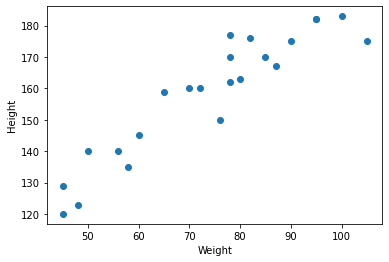

In [5]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [6]:
## divide our dataset into independent and dependent edatures
X=df[['Weight']] ##independent feature
y=df['Height'] ##dependent feature

In [7]:
## Train test split
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [9]:
X.shape

(23, 1)

In [10]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [11]:
## standardize the dataset Train independent data
from sklearn.preprocessing import StandardScaler

In [12]:
scaler=StandardScaler()

In [13]:
X_train.head()

Weight
12     105
1       58
13     100
5       78
2       48

In [14]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

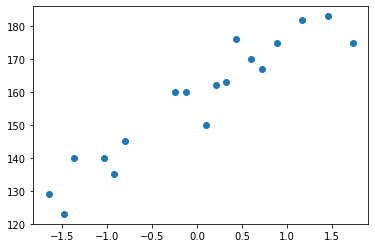

In [15]:
plt.scatter(X_train,y_train)

In [16]:
## Train the Simple Linear Regression Model
from sklearn.linear_model import LinearRegression

In [17]:
regressor=LinearRegression()

In [18]:
regressor.fit(X_train,y_train)

LinearRegression()

In [19]:
print("The slope or coefficient of weight is ",regressor.coef_)
print("Intercept:",regressor.intercept_)

The slope or coefficient of weight is  [17.03440872]
Intercept: 157.5


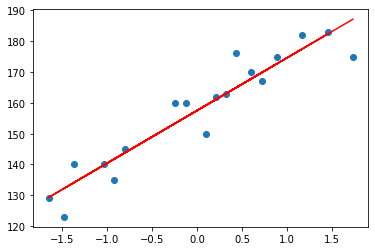

In [20]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

In [21]:
y_pred_test=regressor.predict(X_test)

In [22]:
y_pred_test,y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

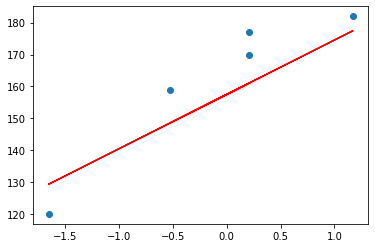

In [23]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test),'r')

## Performance Metrics of Linear Reg


MSE,MAE,RMSE
R square and adjusted R square

In [24]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [25]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


R-square:
    Formula

R^2 = 1 - SSR/SST

R^2 = coefficient of determination SSR = sum of squares of residuals, 
SST = total sum of squares

In [26]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)

In [27]:
score

0.776986986042344

Adjusted R Square: Formula
    
Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-p-1)]

where:

R2: The R2 of the model, n: The number of observations, p: The number of predictor variables/extra features

In [28]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [29]:
regressor

LinearRegression()

In [30]:
## new data point weight is 80

scaled_weight=scaler.transform([[80]])
scaled_weight

array([[0.32350772]])

In [31]:
scaled_weight[0]

array([0.32350772])

In [32]:
print("The height prediction for weight 80 kg is :",regressor.predict([scaled_weight[0]]))

The height prediction for weight 80 kg is : [163.01076266]


In [33]:
scaled_weight=scaler.transform([[100]])
scaled_weight

array([[1.4542143]])

In [34]:
scaled_weight[0]

array([1.4542143])

In [35]:
print("The height prediction for weight 80 kg is :",regressor.predict([scaled_weight[0]]))

The height prediction for weight 80 kg is : [182.27168069]


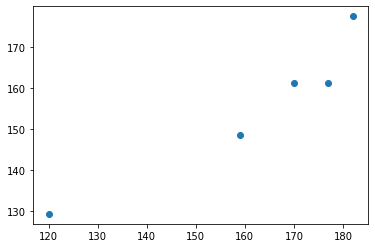

In [36]:
## Assumptions
## plot a scatter plot for the prediction
plt.scatter(y_test,y_pred_test)

In [37]:
## Residuals
residuals=y_test-y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

<AxesSubplot:xlabel='Height'>

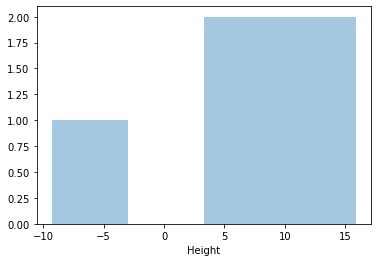

In [38]:
## plot this residuals
import seaborn as sns
sns.distplot(residuals,kde=False)

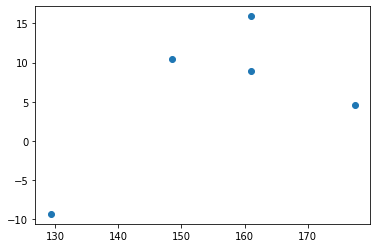

In [39]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(y_pred_test,residuals)

# Multi-Linear Regression

In [40]:
# Multiple Linear Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
# Importing the dataset
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, 4]

In [42]:
#Convert the column into categorical columns

states=pd.get_dummies(X['State'],drop_first=True)

# Drop the state coulmn
X=X.drop('State',axis=1)

# concat the dummy variables
X=pd.concat([X,states],axis=1)



# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [43]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)

Multiple Linear Regression-2

In [44]:
from sklearn.datasets import fetch_california_housing

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
california=fetch_california_housing()

In [47]:
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [48]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [49]:
california.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 20640\n\n:Number of Attributes: 8 numeric, predictive attributes and the target\n\n:Attribute Information:\n    - MedInc        median income in block group\n    - HouseAge      median house age in block group\n    - AveRooms      average number of rooms per household\n    - AveBedrms     average number of bedrooms per household\n    - Population    block group population\n    - AveOccup      average number of household members\n    - Latitude      block group latitude\n    - Longitude     block group longitude\n\n:Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000).\n\nThis dataset was derived from the 1990 U.S

In [50]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [51]:
california.target_names

['MedHouseVal']

In [52]:
print(california.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [53]:
print(california.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [54]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [55]:
## Lets prepare the dataframe 
dataset=pd.DataFrame(california.data,columns=california.feature_names)
dataset.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

In [56]:
dataset['Price']=california.target

In [57]:
dataset.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422

In [58]:
dataset.tail()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  Price  
20635    -121.09  0.781  
20636    -121.21  0.771  
20637    -121.22  0.923  
20638    -121.32  0.847  
20639    -121.24  0.894

In [59]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [60]:
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [61]:
dataset.describe().T

count         mean          std         min         25%  \
MedInc      20640.0     3.870671     1.899822    0.499900    2.563400   
HouseAge    20640.0    28.639486    12.585558    1.000000   18.000000   
AveRooms    20640.0     5.429000     2.474173    0.846154    4.440716   
AveBedrms   20640.0     1.096675     0.473911    0.333333    1.006079   
Population  20640.0  1425.476744  1132.462122    3.000000  787.000000   
AveOccup    20640.0     3.070655    10.386050    0.692308    2.429741   
Latitude    20640.0    35.631861     2.135952   32.540000   33.930000   
Longitude   20640.0  -119.569704     2.003532 -124.350000 -121.800000   
Price       20640.0     2.068558     1.153956    0.149990    1.196000   

                    50%          75%           max  
MedInc         3.534800     4.743250     15.000100  
HouseAge      29.000000    37.000000     52.000000  
AveRooms       5.229129     6.052381    141.909091  
AveBedrms      1.048780     1.099526     34.066667  
Population  1166.000000  1725.000000  35682.000000  
AveOccup       2.818116     3.282261   1243.333333  
Latitude      34.260000    37.710000     41.950000  
Longitude   -118.490000  -118.010000   -114.310000  
Price          1.797000     2.647250      5.000010

<AxesSubplot:>

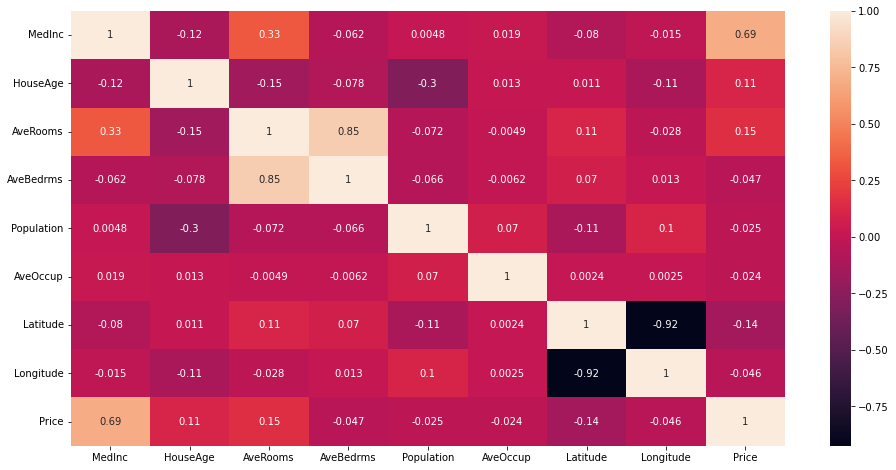

In [62]:
plt.figure(figsize=(16,8))
sns.heatmap(dataset.corr(),annot=True)

In [63]:
##Independent and Dependent features
X=dataset.iloc[:,:-1] #independent features
y=dataset.iloc[:,-1] #dependent features

In [64]:
X.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

In [66]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((13828, 8), (13828,), (6812, 8), (6812,))

In [67]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [68]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [69]:
X_train

array([[-0.72986836,  1.22081889, -0.70305988, ...,  0.05861244,
         0.96929441, -1.43979718],
       [-0.61046678, -0.28439808,  0.07828001, ...,  0.13015917,
        -0.75823526,  1.08204942],
       [ 0.00784578, -0.60128586, -0.2447376 , ..., -0.09793279,
         0.94594941, -1.2454256 ],
       ...,
       [ 0.88684913, -1.78961504, -0.21300658, ...,  0.09549475,
         0.78720344, -1.10587678],
       [-0.87672223,  0.50782138, -1.10043274, ...,  0.18513096,
        -0.77224225,  0.66838683],
       [-0.62742573, -0.99739558, -0.60483749, ..., -0.08418874,
         0.77786545, -1.15073176]])

In [70]:
X_test

array([[ 0.75154854, -1.31428337, -0.39376169, ...,  0.12606697,
        -0.68820027,  0.19491761],
       [ 0.05935857, -0.12595418, -0.33070668, ..., -0.12021013,
         0.89459042, -1.36503888],
       [ 0.34405687, -1.31428337, -0.41007104, ..., -0.15581759,
        -0.91698123,  0.89764561],
       ...,
       [ 0.36483158,  0.27015554,  0.04216837, ..., -0.08014641,
        -0.46875731, -0.43803598],
       [-0.90412152, -0.91817364,  0.66736933, ..., -0.10263685,
         2.51006411, -1.96808915],
       [-0.43377577,  1.22081889, -0.44835491, ...,  0.2807072 ,
        -0.74422826,  0.69330627]])

Model Training

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
regression=LinearRegression()

In [73]:
regression

LinearRegression()

In [74]:
regression.fit(X_train,y_train)

LinearRegression()

In [75]:
## slope or coefficients
regression.coef_

array([ 0.82872299,  0.1231163 , -0.27068752,  0.32859106,  0.00213572,
       -0.02810091, -0.93017985, -0.89505497])

In [76]:
## intercepts
regression.intercept_

2.0634768086491184

In [77]:
## Prediction for the test data
y_pred=regression.predict(X_test)

In [78]:
y_test

20303    1.674
16966    3.541
10623    1.602
6146     1.408
2208     1.078
         ...  
13490    1.123
9340     3.020
17439    1.724
2602     0.838
7180     1.417
Name: Price, Length: 6812, dtype: float64

In [79]:
y_pred

array([3.00397485, 2.58011486, 2.3489077 , ..., 3.09003708, 0.79152007,
       2.04477012])

In [80]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.552233239936362
0.5371056943007961
0.743123973463622


In [81]:
## R square and adjusted R square

from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.5935958526436639


In [82]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5931179409607519

Assumptions

Text(0, 0.5, 'Test Predicted Data')

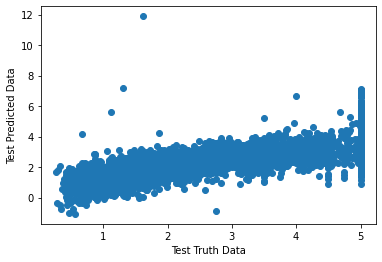

In [83]:
plt.scatter(y_test,y_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [84]:
residuals=y_test-y_pred
residuals

20303   -1.329975
16966    0.960885
10623   -0.746908
6146    -0.307462
2208    -0.662167
           ...   
13490   -0.243475
9340     0.507182
17439   -1.366037
2602     0.046480
7180    -0.627770
Name: Price, Length: 6812, dtype: float64

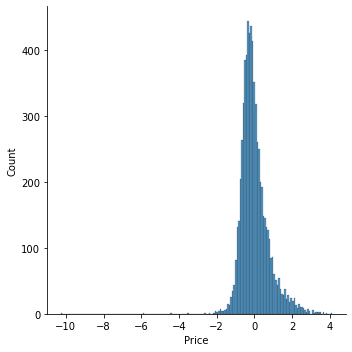

In [85]:
sns.displot(residuals,kde=False)

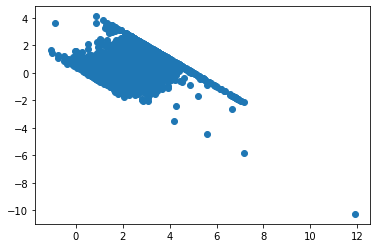

In [86]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(y_pred,residuals)

In [87]:
regression

LinearRegression()

In [88]:
import pickle
pickle.dump(regression,open('regressor.pkl','wb'))

In [89]:
model=pickle.load(open('regressor.pkl','rb'))

In [90]:
model.predict(X_test)

array([3.00397485, 2.58011486, 2.3489077 , ..., 3.09003708, 0.79152007,
       2.04477012])

In [91]:
## https://github.com/krishnaik06/Multicollinearity/blob/master/MultiCollinearity.ipynb

## Logistic Regression

In [92]:
from sklearn.datasets import load_iris

In [93]:
dataset=load_iris()

In [94]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [95]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [96]:
import pandas as pd
import numpy as np

In [97]:
df=pd.DataFrame(dataset.data,columns=dataset.feature_names)

In [98]:
print(dataset.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [99]:
df['target']=dataset.target

In [100]:
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [101]:
df['target'].unique()

array([0, 1, 2])

In [102]:
df[df['target']!=2]

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                 5.1               3.5                1.4               0.2   
1                 4.9               3.0                1.4               0.2   
2                 4.7               3.2                1.3               0.2   
3                 4.6               3.1                1.5               0.2   
4                 5.0               3.6                1.4               0.2   
..                ...               ...                ...               ...   
95                5.7               3.0                4.2               1.2   
96                5.7               2.9                4.2               1.3   
97                6.2               2.9                4.3               1.3   
98                5.1               2.5                3.0               1.1   
99                5.7               2.8                4.1               1.3   

    target  
0        0  
1        0  
2        0  
3        0  
4        0  
..     ...  
95       1  
96       1  
97       1  
98       1  
99       1  

[100 rows x 5 columns]

In [103]:
df_copy=df[df['target']!=2]

In [104]:
df_copy['target'].unique()

array([0, 1])

In [105]:
## Independent and dependent features
X=df_copy.iloc[:,:-1]
y=df_copy.iloc[:,-1]

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [107]:
from sklearn.linear_model import LogisticRegression

In [108]:
classification=LogisticRegression(max_iter=200)

In [109]:
classification

LogisticRegression(max_iter=200)

In [110]:
classification.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [111]:
y_pred=classification.predict(X_test)

In [112]:
y_pred

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

**Confusion Metrics,Accuracy,Classification Report**

In [113]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [114]:
print(confusion_matrix(y_test,y_pred))

[[12  0]
 [ 0  8]]


In [115]:
print(accuracy_score(y_test,y_pred))

1.0


In [116]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



**Cross Validation**

In [117]:
from sklearn.model_selection import KFold

In [118]:
cv=KFold(n_splits=5)

In [119]:
cv

KFold(n_splits=5, random_state=None, shuffle=False)

In [120]:
from sklearn.model_selection import cross_val_score

In [121]:
## these are the scores all the cross validation
scores=cross_val_score(classification,X_train,y_train,scoring='accuracy',cv=cv)

In [122]:
np.mean(scores)

1.0

In [123]:
## Lets see more complex data

# make a prediction with a multinomial logistic regression model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=2, random_state=1)

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [126]:
complex_class_model=LogisticRegression(max_iter=200)

In [127]:
complex_class_model.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [128]:
y_pred_complex=complex_class_model.predict(X_test)

In [129]:
print(confusion_matrix(y_test,y_pred_complex))
print(accuracy_score(y_test,y_pred_complex))
print(classification_report(y_test,y_pred_complex))

[[78 13]
 [29 80]]
0.79
              precision    recall  f1-score   support

           0       0.73      0.86      0.79        91
           1       0.86      0.73      0.79       109

    accuracy                           0.79       200
   macro avg       0.79      0.80      0.79       200
weighted avg       0.80      0.79      0.79       200



In [130]:
## Cross Validatiuon
cv=KFold(n_splits=5)
cross_val_score(complex_class_model,X_train,y_train,cv=cv)

array([0.80625, 0.78125, 0.79375, 0.8125 , 0.85625])

## Logisitic Regression Hyperparameters

In [131]:
## Lets see more complex data

# make a prediction logistic regression model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=2, random_state=1)

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

**Model Training**

**Grid Search CV**

In [133]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [134]:
parameters={'penalty':('l1', 'l2','elasticnet'),'C':[1,10,20,30]}

In [135]:
classifier=LogisticRegression()

In [136]:
clf=GridSearchCV(classifier,param_grid=parameters,cv=5)

In [137]:
classifier=LogisticRegression()

In [138]:
clf=GridSearchCV(classifier,param_grid=parameters,cv=5)

In [139]:
## Splitting of Training data to train and validation
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 20, 30],
                         'penalty': ('l1', 'l2', 'elasticnet')})

In [140]:
clf.best_params_

{'C': 1, 'penalty': 'l2'}

In [141]:
clf.best_score_

0.8087500000000001

In [142]:
classifier=LogisticRegression(C=1,penalty='l2')

In [143]:
classifier.fit(X_train,y_train)

LogisticRegression(C=1)

In [144]:
y_pred=classifier.predict(X_test)

In [145]:
y_pred

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1])

In [146]:
classifier.predict_proba(X_test)

array([[0.71651923, 0.28348077],
       [0.1950465 , 0.8049535 ],
       [0.12414182, 0.87585818],
       [0.05044049, 0.94955951],
       [0.8877372 , 0.1122628 ],
       [0.75067873, 0.24932127],
       [0.97980988, 0.02019012],
       [0.39209128, 0.60790872],
       [0.59915467, 0.40084533],
       [0.39298278, 0.60701722],
       [0.20417269, 0.79582731],
       [0.80256674, 0.19743326],
       [0.8642444 , 0.1357556 ],
       [0.92666604, 0.07333396],
       [0.00131606, 0.99868394],
       [0.04168894, 0.95831106],
       [0.56294841, 0.43705159],
       [0.89322189, 0.10677811],
       [0.29273031, 0.70726969],
       [0.00870462, 0.99129538],
       [0.71874782, 0.28125218],
       [0.51089475, 0.48910525],
       [0.76228576, 0.23771424],
       [0.73168731, 0.26831269],
       [0.10152661, 0.89847339],
       [0.04045506, 0.95954494],
       [0.57929547, 0.42070453],
       [0.00526033, 0.99473967],
       [0.03099815, 0.96900185],
       [0.96092766, 0.03907234],
       [0.

In [147]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [148]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[78 13]
 [29 80]]
0.79
              precision    recall  f1-score   support

           0       0.73      0.86      0.79        91
           1       0.86      0.73      0.79       109

    accuracy                           0.79       200
   macro avg       0.79      0.80      0.79       200
weighted avg       0.80      0.79      0.79       200



**Randomized Search CV**

In [149]:
from sklearn.model_selection import RandomizedSearchCV

In [150]:
random_clf=RandomizedSearchCV(LogisticRegression(),param_distributions=parameters,cv=5,n_iter=20)

In [151]:
random_clf

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': [1, 10, 20, 30],
                                        'penalty': ('l1', 'l2', 'elasticnet')})

In [152]:
random_clf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': [1, 10, 20, 30],
                                        'penalty': ('l1', 'l2', 'elasticnet')})

In [153]:
random_clf.best_params_

{'penalty': 'l2', 'C': 1}

## Logistic Regression for Multiclass Classification  

In [154]:
# make a prediction with a multinomial logistic regression model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)

In [155]:
y

array([1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 1, 0, 1, 0, 2, 0,
       2, 2, 0, 0, 2, 0, 1, 1, 2, 1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 1, 2, 1,
       1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 0, 1, 2, 2, 2,
       0, 1, 0, 2, 1, 0, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 0, 2, 2, 2, 2,
       1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 0, 1,
       0, 0, 2, 2, 0, 0, 1, 1, 1, 1, 0, 2, 0, 1, 2, 0, 2, 1, 2, 0, 0, 1,
       0, 0, 2, 2, 2, 2, 2, 1, 2, 0, 1, 2, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 2, 1, 1, 0,
       1, 1, 1, 1, 2, 1, 0, 2, 2, 1, 2, 1, 1, 2, 0, 0, 0, 2, 2, 2, 0, 2,
       0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 0, 2, 2,
       1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 2,
       1, 2, 1, 2, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 0, 1, 0, 0, 1, 1, 1,
       1, 2, 1, 2, 2, 2, 1, 0, 0, 1, 0, 0, 2, 1, 1,

In [156]:
# define the multinomial logistic regression model For multiclass classification
model = LogisticRegression(multi_class='ovr', solver='lbfgs')

In [157]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [158]:
# trianing model
model.fit(X_train,y_train)

LogisticRegression(multi_class='ovr')

In [159]:
y_pred=model.predict(X_test)

In [160]:
y_pred

array([1, 1, 0, 2, 1, 2, 2, 2, 0, 0, 2, 0, 0, 1, 1, 0, 1, 2, 0, 0, 1, 0,
       2, 1, 0, 1, 1, 0, 2, 2, 0, 1, 0, 1, 0, 2, 0, 2, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 2, 1, 2, 0, 2, 2, 2, 0, 1, 1, 0, 0, 2, 0, 2, 0, 1,
       2, 1, 0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 1, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2, 1,
       0, 1, 1, 2, 2, 2, 1, 2, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 1, 1, 0, 1, 2, 0, 1, 0, 2, 0, 0, 1, 1, 0,
       2, 0, 1, 0, 2, 1, 2, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 1, 1, 2, 1, 0,
       2, 1, 1, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0])

In [161]:
model.predict_proba(X_test)

array([[9.10641007e-02, 5.88918814e-01, 3.20017086e-01],
       [7.74913438e-02, 8.83935792e-01, 3.85728639e-02],
       [6.84424719e-01, 2.03486076e-01, 1.12089205e-01],
       [1.43078246e-02, 9.01463818e-02, 8.95545794e-01],
       [6.87563505e-02, 8.36639008e-01, 9.46046415e-02],
       [1.08997130e-01, 3.07635489e-01, 5.83367380e-01],
       [3.78574343e-01, 2.08257319e-01, 4.13168338e-01],
       [3.14075303e-01, 1.75938154e-01, 5.09986543e-01],
       [5.14661374e-01, 1.90320746e-01, 2.95017880e-01],
       [5.97855686e-01, 3.02391035e-01, 9.97532791e-02],
       [4.20049273e-02, 3.31576489e-01, 6.26418584e-01],
       [4.86732760e-01, 1.04800924e-01, 4.08466316e-01],
       [8.01128811e-01, 3.37464192e-02, 1.65124770e-01],
       [8.98155592e-02, 6.97988466e-01, 2.12195975e-01],
       [7.29031504e-02, 8.39118736e-01, 8.79781132e-02],
       [5.10593601e-01, 2.09236547e-01, 2.80169852e-01],
       [1.24309393e-01, 7.90830108e-01, 8.48604992e-02],
       [3.42809146e-03, 3.71695

In [162]:
y_pred

array([1, 1, 0, 2, 1, 2, 2, 2, 0, 0, 2, 0, 0, 1, 1, 0, 1, 2, 0, 0, 1, 0,
       2, 1, 0, 1, 1, 0, 2, 2, 0, 1, 0, 1, 0, 2, 0, 2, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 2, 1, 2, 0, 2, 2, 2, 0, 1, 1, 0, 0, 2, 0, 2, 0, 1,
       2, 1, 0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 1, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2, 1,
       0, 1, 1, 2, 2, 2, 1, 2, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 1, 1, 0, 1, 2, 0, 1, 0, 2, 0, 0, 1, 1, 0,
       2, 0, 1, 0, 2, 1, 2, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 1, 1, 2, 1, 0,
       2, 1, 1, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0])

In [163]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[56 10 17]
 [16 41  6]
 [ 3 13 38]]
0.675
              precision    recall  f1-score   support

           0       0.75      0.67      0.71        83
           1       0.64      0.65      0.65        63
           2       0.62      0.70      0.66        54

    accuracy                           0.68       200
   macro avg       0.67      0.68      0.67       200
weighted avg       0.68      0.68      0.68       200



# Decision Tree Classifier Implementation With Post Prunning And Preprunning

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [165]:
from sklearn.datasets import load_iris

In [166]:
dataset=load_iris()

In [167]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [168]:
import seaborn as sns
df=sns.load_dataset('iris')

In [169]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [170]:
#Independent and dependent features
X=df.iloc[:,:-1]
y=dataset.target

In [171]:
### train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [172]:
from sklearn.tree import DecisionTreeClassifier

In [173]:
classifier=DecisionTreeClassifier(criterion='entropy')

In [174]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [175]:
X_train.head()

sepal_length  sepal_width  petal_length  petal_width
96            5.7          2.9           4.2          1.3
105           7.6          3.0           6.6          2.1
66            5.6          3.0           4.5          1.5
0             5.1          3.5           1.4          0.2
122           7.7          2.8           6.7          2.0

[Text(0.4444444444444444, 0.9285714285714286, 'x[2] <= 2.45\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.3333333333333333, 0.7857142857142857, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.38888888888888884, 0.8571428571428572, 'True  '),
 Text(0.5555555555555556, 0.7857142857142857, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.5, 0.8571428571428572, '  False'),
 Text(0.3333333333333333, 0.6428571428571429, 'x[2] <= 5.35\nentropy = 0.485\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.2222222222222222, 0.5, 'x[3] <= 1.45\nentropy = 0.31\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.1111111111111111, 0.35714285714285715, 'entropy = 0.0\nsamples = 26\nvalue = [0, 26, 0]'),
 Text(0.3333333333333333, 0.35714285714285715, 'x[1] <= 2.6\nentropy = 0.722\nsamples = 10\nvalue = [0, 8, 2]'),
 Text(0.2222222222222222, 0.21428571428571427, 'x[0] <= 6.15\nentropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.1111111111111111, 0.071428

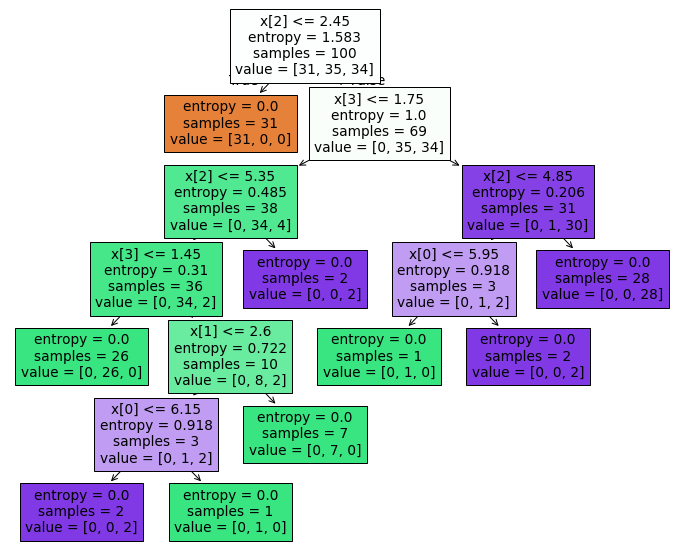

In [176]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(classifier,filled=True)

In [177]:
## Post Prunning
classifier=DecisionTreeClassifier(criterion='entropy',max_depth=2)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.485\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.206\nsamples = 31\nvalue = [0, 1, 30]')]

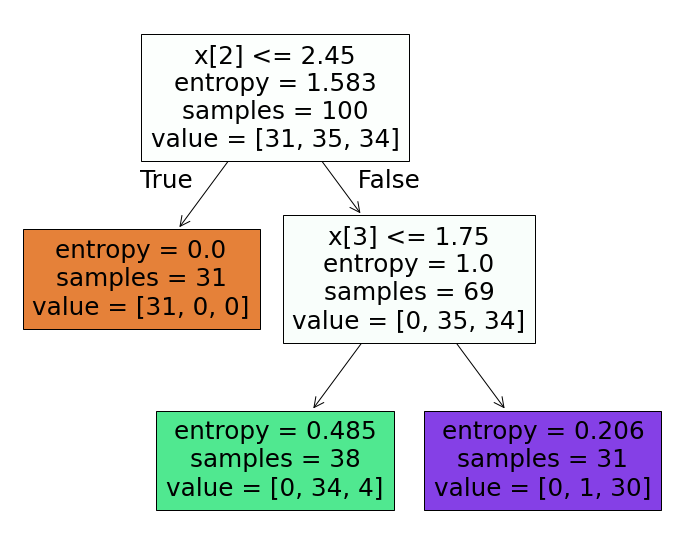

In [178]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(classifier,filled=True)

In [179]:
##prediction
y_pred=classifier.predict(X_test)

In [180]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [181]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))

0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



**DecisionTree Prepruning And Hyperparameter Tuning For Huge Data**

In [182]:
import warnings
warnings.filterwarnings('ignore')

In [183]:
#Prepruing
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']

}

In [184]:
from sklearn.model_selection import GridSearchCV

In [185]:
classifier=DecisionTreeClassifier()
clf=GridSearchCV(classifier,param_grid=parameter,cv=5,scoring='accuracy')

In [186]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [187]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'best'}

In [188]:
y_pred=clf.predict(X_test)

In [189]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))

0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



## Decision Tree Regressor Implementation

In [190]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [191]:
##California House Pricing Dataset
from sklearn.datasets import fetch_california_housing
california_df=fetch_california_housing()

In [192]:
california_df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [193]:
df=pd.DataFrame(california_df.data,columns=california_df.feature_names)
df['Target']=california_df.target

In [194]:
df.shape

(20640, 9)

In [195]:
## Taking Sample Data 25% bcoz of Time consuming in Hyperparameter Tuning
df=df.sample(frac=0.25)

In [196]:
df.shape

(5160, 9)

In [197]:
#independent features
X=df.iloc[:,:-1]
#dependent features
y=df.iloc[:,-1]

In [198]:
X.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
3195   2.8281      20.0  6.100000   1.082500      1579.0  3.947500     36.31   
17368  2.8649       4.0  4.958478   1.121107      1311.0  2.268166     34.93   
13339  5.7530      14.0  6.071023   0.980114      1151.0  3.269886     34.03   
12056  1.6875      42.0  4.322034   0.966102       590.0  3.333333     33.87   
9612   1.2054      16.0  3.343750   0.991071      1277.0  5.700893     37.29   

       Longitude  
3195     -119.73  
17368    -120.43  
13339    -117.66  
12056    -117.58  
9612     -120.47

In [199]:
### train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [200]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()

In [201]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [202]:
y_pred=regressor.predict(X_test)

In [203]:
y_pred

array([5.00001, 1.269  , 2.353  , ..., 3.25   , 2.4    , 4.955  ])

In [204]:
from sklearn.metrics import r2_score
score=r2_score(y_pred,y_test)

In [205]:
score

0.4598964635961239

In [206]:
## Hyperparameter Tunning
parameter={
 'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8,10,11,12],
  'max_features':['auto', 'sqrt', 'log2']
    
}
regressor=DecisionTreeRegressor()

In [207]:
#https://scikit-learn.org/stable/modules/model_evaluation.html
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
regressorcv=GridSearchCV(regressor,param_grid=parameter,cv=2,scoring='neg_mean_squared_error')

In [208]:
regressorcv.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [209]:
regressorcv.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 7,
 'max_features': 'log2',
 'splitter': 'best'}

In [210]:
regressor=DecisionTreeRegressor(criterion='absolute_error',max_depth=7,max_features=None,splitter='best')

In [211]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=7)

In [212]:
%matplotlib inline

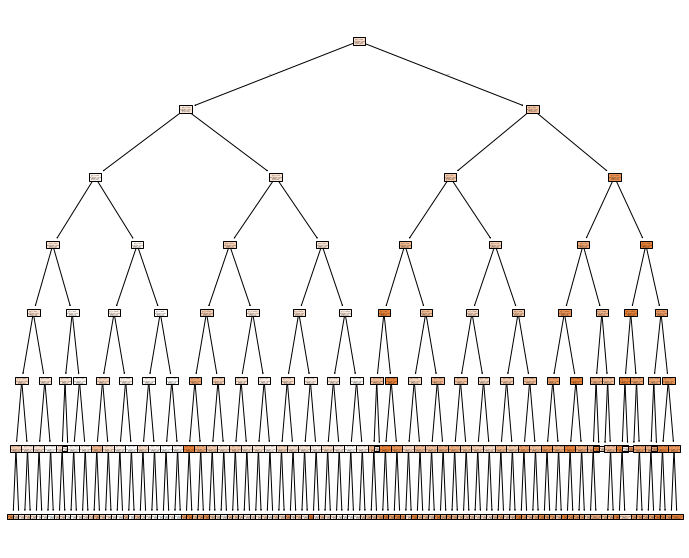

In [213]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(regressor,filled=True)
plt.show()

In [214]:
y_pred=regressorcv.predict(X_test)

In [215]:
r2_score(y_pred,y_test)

0.24570879269414148

In [216]:
#Post-pruning Technique

#https://github.com/krishnaik06/Post_Pruning_DecisionTre/blob/master/plot_cost_complexity_pruning.ipynb

# KNN

In [217]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [218]:
df = pd.read_csv("Classified Data.txt",index_col=0)

In [219]:
df.head()

WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0  0.913917  1.162073  0.567946  0.755464  0.780862  0.352608  0.759697   
1  0.635632  1.003722  0.535342  0.825645  0.924109  0.648450  0.675334   
2  0.721360  1.201493  0.921990  0.855595  1.526629  0.720781  1.626351   
3  1.234204  1.386726  0.653046  0.825624  1.142504  0.875128  1.409708   
4  1.279491  0.949750  0.627280  0.668976  1.232537  0.703727  1.115596   

        PJF       HQE       NXJ  TARGET CLASS  
0  0.643798  0.879422  1.231409             1  
1  1.013546  0.621552  1.492702             0  
2  1.154483  0.957877  1.285597             0  
3  1.380003  1.522692  1.153093             1  
4  0.646691  1.463812  1.419167             1

In [220]:
from sklearn.preprocessing import StandardScaler

In [221]:
scaler = StandardScaler()

In [222]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [223]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [224]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0 -0.123542  0.185907 -0.913431  0.319629 -1.033637 -2.308375 -0.798951   
1 -1.084836 -0.430348 -1.025313  0.625388 -0.444847 -1.152706 -1.129797   
2 -0.788702  0.339318  0.301511  0.755873  2.031693 -0.870156  2.599818   
3  0.982841  1.060193 -0.621399  0.625299  0.452820 -0.267220  1.750208   
4  1.139275 -0.640392 -0.709819 -0.057175  0.822886 -0.936773  0.596782   

        PJF       HQE       NXJ  
0 -1.482368 -0.949719 -0.643314  
1 -0.202240 -1.828051  0.636759  
2  0.285707 -0.682494 -0.377850  
3  1.066491  1.241325 -1.026987  
4 -1.472352  1.040772  0.276510

In [225]:
from sklearn.model_selection import train_test_split

In [226]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],test_size=0.30)

In [227]:
from sklearn.neighbors import KNeighborsClassifier

In [228]:
knn = KNeighborsClassifier(n_neighbors=1)

In [229]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [230]:
pred = knn.predict(X_test)

In [231]:
from sklearn.metrics import classification_report,confusion_matrix

In [232]:
print(confusion_matrix(y_test,pred))

[[135  18]
 [ 11 136]]


In [233]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       153
           1       0.88      0.93      0.90       147

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [234]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

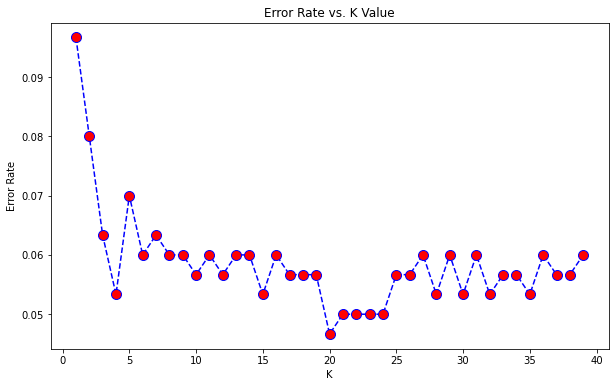

In [235]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [236]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=4')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=4


[[135  18]
 [ 11 136]]


              precision    recall  f1-score   support

           0       0.92      0.88      0.90       153
           1       0.88      0.93      0.90       147

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [237]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[143  10]
 [  8 139]]


              precision    recall  f1-score   support

           0       0.95      0.93      0.94       153
           1       0.93      0.95      0.94       147

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



# Another Implementation

In [238]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [239]:
df = pd.read_csv("Classified Data.txt",index_col=0)

In [240]:
df.head()

WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0  0.913917  1.162073  0.567946  0.755464  0.780862  0.352608  0.759697   
1  0.635632  1.003722  0.535342  0.825645  0.924109  0.648450  0.675334   
2  0.721360  1.201493  0.921990  0.855595  1.526629  0.720781  1.626351   
3  1.234204  1.386726  0.653046  0.825624  1.142504  0.875128  1.409708   
4  1.279491  0.949750  0.627280  0.668976  1.232537  0.703727  1.115596   

        PJF       HQE       NXJ  TARGET CLASS  
0  0.643798  0.879422  1.231409             1  
1  1.013546  0.621552  1.492702             0  
2  1.154483  0.957877  1.285597             0  
3  1.380003  1.522692  1.153093             1  
4  0.646691  1.463812  1.419167             1

In [241]:
from sklearn.preprocessing import StandardScaler

In [242]:
scaler = StandardScaler()

In [243]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [244]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [245]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0 -0.123542  0.185907 -0.913431  0.319629 -1.033637 -2.308375 -0.798951   
1 -1.084836 -0.430348 -1.025313  0.625388 -0.444847 -1.152706 -1.129797   
2 -0.788702  0.339318  0.301511  0.755873  2.031693 -0.870156  2.599818   
3  0.982841  1.060193 -0.621399  0.625299  0.452820 -0.267220  1.750208   
4  1.139275 -0.640392 -0.709819 -0.057175  0.822886 -0.936773  0.596782   

        PJF       HQE       NXJ  
0 -1.482368 -0.949719 -0.643314  
1 -0.202240 -1.828051  0.636759  
2  0.285707 -0.682494 -0.377850  
3  1.066491  1.241325 -1.026987  
4 -1.472352  1.040772  0.276510

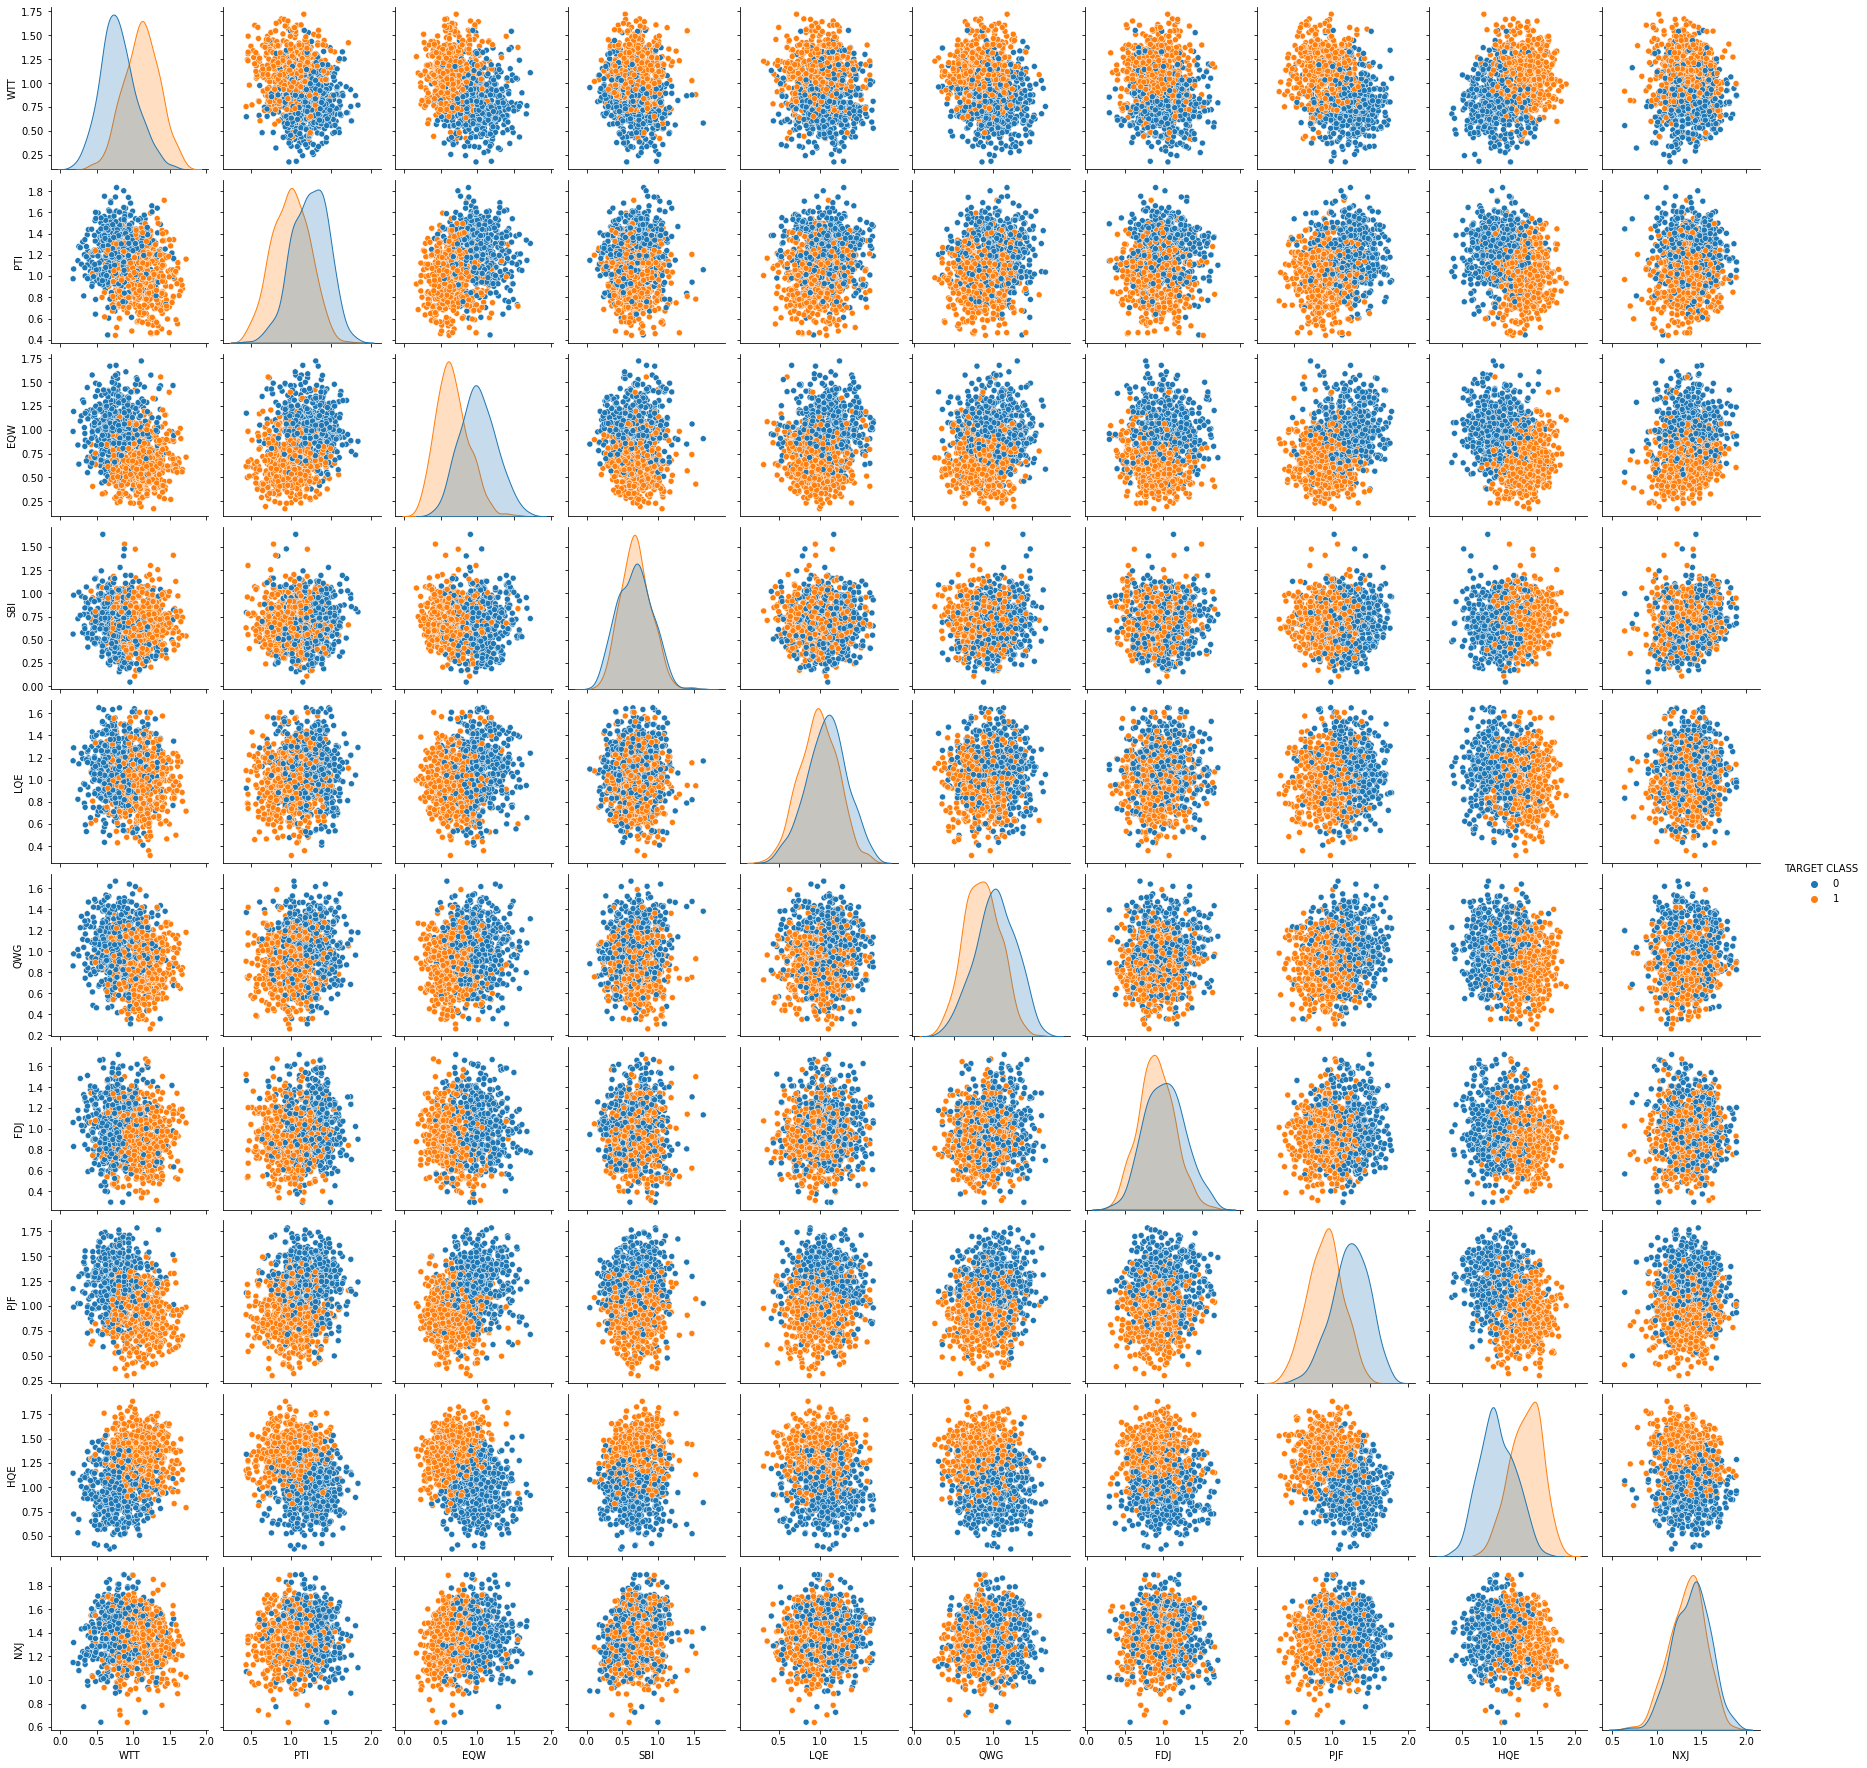

In [246]:
import seaborn as sns

sns.pairplot(df,hue='TARGET CLASS')

In [247]:
from sklearn.model_selection import train_test_split

In [248]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],test_size=0.30)

In [249]:
from sklearn.neighbors import KNeighborsClassifier

In [250]:
knn = KNeighborsClassifier(n_neighbors=1)

In [251]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [252]:
pred = knn.predict(X_test)

In [253]:
from sklearn.metrics import classification_report,confusion_matrix

In [254]:
print(confusion_matrix(y_test,pred))

[[141  15]
 [ 13 131]]


In [255]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       156
           1       0.90      0.91      0.90       144

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [256]:
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,df['TARGET CLASS'],cv=10)
    accuracy_rate.append(score.mean())

In [257]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,df['TARGET CLASS'],cv=10)
    error_rate.append(1-score.mean())

In [258]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

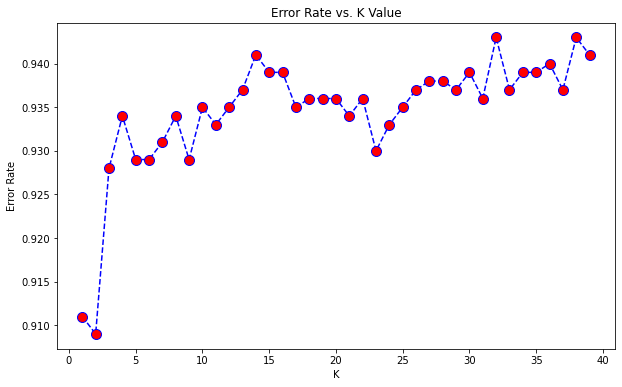

In [259]:
plt.figure(figsize=(10,6))
#plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
  #       markerfacecolor='red', markersize=10)
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [260]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[141  15]
 [ 13 131]]


              precision    recall  f1-score   support

           0       0.92      0.90      0.91       156
           1       0.90      0.91      0.90       144

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [261]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[138  18]
 [  3 141]]


              precision    recall  f1-score   support

           0       0.98      0.88      0.93       156
           1       0.89      0.98      0.93       144

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



## KNN Classifier

In [262]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [263]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1000, # 1000 observations 
    n_features=3, # 3 total features
     n_redundant=1,
    n_classes=2, # binary target/label 
    random_state=999 
)

In [264]:
X

array([[-0.33504974,  0.02852654,  1.16193084],
       [-1.37746253, -0.4058213 ,  0.44359618],
       [-1.04520026, -0.72334759, -3.10470423],
       ...,
       [-0.75602574, -0.51816111, -2.20382324],
       [ 0.56066316, -0.07335845, -2.15660348],
       [-1.87521902, -1.11380394, -4.04620773]])

In [265]:
from sklearn.model_selection import train_test_split

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [267]:
from sklearn.neighbors import KNeighborsClassifier

In [268]:
classifier=KNeighborsClassifier(n_neighbors=5,algorithm='auto')
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [269]:
y_pred=classifier.predict(X_test)

In [270]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [271]:
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[158  20]
 [ 11 141]]
0.906060606060606
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       178
           1       0.88      0.93      0.90       152

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



## KNN Regressor

In [272]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=1000, n_features=2, noise=10, random_state=42)

In [273]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [274]:
from sklearn.neighbors import KNeighborsRegressor

In [275]:
regressor=KNeighborsRegressor(n_neighbors=6,algorithm='auto')
regressor.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=6)

In [276]:
y_pred=regressor.predict(X_test)

In [277]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [278]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.9189275159979495
9.009462452972217
127.45860414317289


# SVM

In [279]:
## https://github.com/krishnaik06/SVM-Kernels/blob/main/SVM%20Kernelss%20Implementation.ipynb

In [280]:
#Polynomial Kernal
#rbf- radial basis fn. Kernal
#Sigmoid Kernal

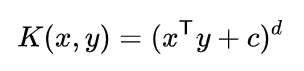

In [281]:
#SVM Regression

#https://github.com/krishnaik06/The-Grand-Complete-Data-Science-Materials/blob/main/Machine%20Learning/5-%20SVM/Practicals/Support%20Vector%20Regression%20Implementation.ipynb

In [282]:
#PR-Curve

import pandas as pd
import numpy as np
import scikitplot as skplt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [283]:
url = 'https://www.alvinang.sg/s/iris_dataset.csv';

In [284]:
df = pd.read_csv(url)
X = df.iloc[:, :4]
y = df.iloc[:, -1]

In [285]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [286]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [287]:
y_probs = model.predict_proba(X_test)

<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

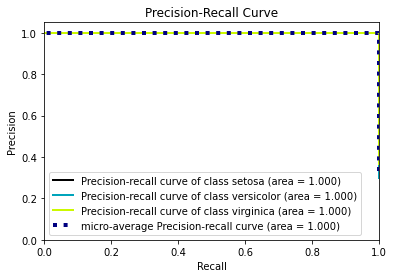

In [288]:
skplt.metrics.plot_precision_recall_curve(y_test, y_probs)

In [289]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [290]:
iris=datasets.load_iris()

X=iris.data
y=iris.target

In [291]:
#Splitting the data
X_train, X_test, y_train,y_test=train_test_split(X, y, test_size = 0.3)

In [292]:
#Initializing SVM

clf = SVC()

In [293]:
#Setting values for hyperparameters

parameters={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}

#Grid search for hyperparameter tuning
grid_search=GridSearchCV(clf, parameters, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [294]:
print(grid_search.best_params_)

{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


In [295]:
clf= SVC(**grid_search.best_params_)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [296]:
y_pred

array([0, 0, 0, 2, 2, 0, 2, 1, 1, 0, 2, 2, 0, 2, 1, 0, 0, 2, 2, 2, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 2,
       2])

## SVC

In [297]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [298]:
## Lets create synthetic data points
from sklearn.datasets import make_classification

In [299]:
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

In [300]:
X

array([[-0.94827477,  0.85351382],
       [ 1.15668479,  1.39912884],
       [ 0.52276104, -1.54806032],
       ...,
       [ 1.26512888, -2.94535995],
       [-1.13988533,  1.04398288],
       [-1.3105326 , -0.08929897]])

In [301]:
y

array([0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,

In [302]:
pd.DataFrame(X)[0]

0     -0.948275
1      1.156685
2      0.522761
3      1.512619
4      0.231575
         ...   
995   -1.291270
996    0.962557
997    1.265129
998   -1.139885
999   -1.310533
Name: 0, Length: 1000, dtype: float64

<AxesSubplot:xlabel='0', ylabel='1'>

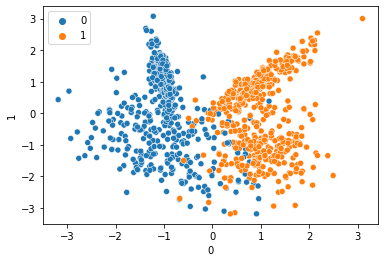

In [303]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [304]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [305]:
from sklearn.svm import SVC

In [306]:
svc=SVC(kernel='linear')

In [307]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [308]:
svc.coef_

array([[2.2573412 , 0.48627176]])

In [309]:
## Prediction
y_pred=svc.predict(X_test)

In [310]:
y_pred

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1])

In [311]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [312]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       124
           1       0.94      0.94      0.94       126

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250

[[117   7]
 [  8 118]]
0.94


**Hyperparametere Tuning With SVC**

In [313]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],  # Regularization parameter
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
              'kernel':['linear']
              }

In [314]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [315]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.973 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.973 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.927 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.947 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.967 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.973 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.973 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.927 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.947 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.967 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.973 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

[CV 2/5] END ....C=1000, gamma=1, kernel=linear;, score=0.973 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=1, kernel=linear;, score=0.920 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=1, kernel=linear;, score=0.940 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=1, kernel=linear;, score=0.960 total time=   0.0s
[CV 1/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.967 total time=   0.0s
[CV 2/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.973 total time=   0.0s
[CV 3/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.920 total time=   0.0s
[CV 4/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.940 total time=   0.0s
[CV 5/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.960 total time=   0.0s
[CV 1/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.967 total time=   0.0s
[CV 2/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.973 total time=   0.0s
[CV 3/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.920 total time=   0.0s
[CV 4/5] END .C=1000, gamma=

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [316]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [317]:
## Prediction
y_pred4=grid.predict(X_test)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       124
           1       0.94      0.94      0.94       126

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250

[[117   7]
 [  8 118]]
0.94


## SVR

In [318]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [319]:
## Lets create synthetic data points
from sklearn.datasets import make_regression

In [320]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [321]:
X

array([[-0.21439063, -1.72213109],
       [-1.11509292, -0.28329785],
       [-1.29768418,  1.58113766],
       ...,
       [-0.01881135,  1.15984312],
       [ 0.2367971 , -0.49283904],
       [-0.95582654, -1.88919024]])

In [322]:
y

array([-1.29282405e+02, -1.29979152e+02, -2.96494433e+01,  1.03600370e+01,
       -2.67395500e+01,  1.75111080e+02, -1.93146765e+01,  2.17164445e+00,
        1.92875691e+02, -9.73085146e+01, -1.97288649e+02, -7.01589263e+01,
       -1.33487943e+02,  1.59063296e+02, -8.45109744e+01,  1.64692962e+01,
        3.05374334e+01, -1.15272318e+01, -1.04836472e+01, -1.95711485e+01,
        1.73887002e+02,  1.35267817e+02, -3.87352563e+01,  7.77635123e+01,
        2.94954693e+02,  2.20850646e+02, -2.19066672e+02,  1.57388005e+02,
       -8.30574363e+01, -9.23187566e+01, -3.54802883e+01, -6.19131136e+01,
        1.15876301e+02,  7.18604869e+01, -6.21541390e+01,  6.52287699e+01,
        2.23185298e+01, -2.23088901e+02,  1.23896544e+02,  9.54148053e+01,
       -7.16705359e+01, -4.65258188e+01,  1.39403028e+02,  5.66343452e+01,
        1.06190667e+02, -7.90320355e+01,  1.69947428e+02,  1.05067545e+02,
        4.27002898e+01,  4.89734554e+01,  2.93407528e+01,  5.35915462e-01,
       -4.78067010e+00, -

In [323]:
pd.DataFrame(X)[0]

0     -0.214391
1     -1.115093
2     -1.297684
3     -0.125371
4     -0.959664
         ...   
995   -0.957650
996   -0.883377
997   -0.018811
998    0.236797
999   -0.955827
Name: 0, Length: 1000, dtype: float64

<AxesSubplot:xlabel='0', ylabel='1'>

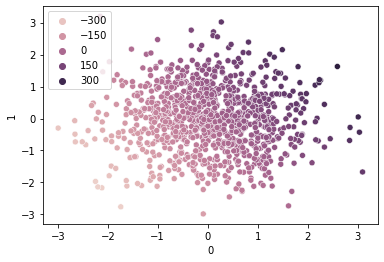

In [324]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [325]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [326]:
from sklearn.svm import SVR

In [327]:
svr=SVR(kernel='linear')

In [328]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [329]:
svr.coef_

array([[97.68169012, 59.93662702]])

In [330]:
## Prediction
y_pred=svr.predict(X_test)

In [331]:
y_pred

array([-105.39575826, -264.03671163,    2.46205772,   73.13544721,
         -0.71627807,  -30.98304966, -156.01087624,  -51.71990869,
        -73.60653211,  148.13406783, -299.87537531,  105.27486747,
          0.53126143,  131.30384603, -202.52115578,   25.51396076,
        -83.60482759, -124.34434876,   55.58059353,  146.29430515,
         79.15766586,  -10.02089267,  169.1802006 , -100.48639987,
       -187.30224485,   31.41792422,  -25.48119061,  -87.52277002,
        -18.50457779,    8.32184477,  -86.27369884,   16.50493426,
         58.82031176,  -20.7790389 ,  113.74511457,  -18.74830925,
        122.63013697,  -16.73008412,  -52.59661286,  207.53771973,
       -120.32048249,  -49.17385327,  -64.0192369 ,  -98.43862589,
         -8.39441108,  -37.74542774, -128.76465348,   30.525211  ,
         52.88119192,  -52.39845376,  158.38201232,  -26.14706503,
        -89.18162586,  169.92628721,  -21.44278137,   -7.96957375,
        -22.05012153, -124.19457382,   88.83053354,  -40.77652

In [332]:
from sklearn.metrics import r2_score

In [333]:
print(r2_score(y_test,y_pred))

0.9992253771082946


**Hyperparametere Tuning With SVR**

In [334]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]
              }

In [335]:
grid=GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [336]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.615 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.630 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.593 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.630 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.631 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.615 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.630 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.593 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.630 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.631 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

[CV 1/5] END C=1, epsilon=0.1, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.1, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.1, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.999 total time=   0.0

[CV 5/5] END C=10, epsilon=0.2, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   

[CV 1/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=100, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5]

[CV 5/5] END C=1000, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.999 total time=   0.4s
[CV 1/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.999 total time=   0.4s
[CV 2/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.999 total time=   0.5s
[CV 3/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.999 total time=   0.5s
[CV 4/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.999 total time=   0.4s
[CV 5/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.999 total time=   0.4s
[CV 1/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.4s
[CV 2/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.4s
[CV 3/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.4s
[CV 4/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.3s
[CV 5/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=li

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [337]:
grid.best_params_

{'C': 10, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [338]:
## Prediction
y_pred4=grid.predict(X_test)
print(r2_score(y_test,y_pred4))

0.9992884858867046


## SVM-Kernals (Non-Linear)

In [339]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10**2 - x**2)
y=np.hstack([y,-y])
x=np.hstack([x,-x])

In [340]:
x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])

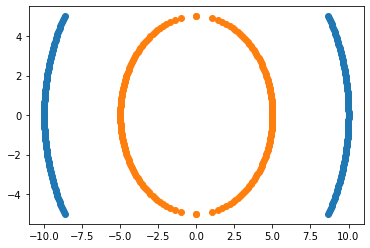

In [341]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [342]:
import numpy as np
import pandas as pd

# Example definitions (replace these with your actual data)
x = np.random.randn(100)
y = np.random.randn(100)
x1 = np.random.randn(100)
y1 = np.random.randn(100)

# Create df1 and df2
df1 = pd.DataFrame(np.vstack([y, x]).T, columns=['X1', 'X2'])
df1['Y'] = 0

df2 = pd.DataFrame(np.vstack([y1, x1]).T, columns=['X1', 'X2'])
df2['Y'] = 1

# Combine df1 and df2 using pd.concat
df = pd.concat([df1, df2], ignore_index=True)

# Display the first 5 rows of the combined dataframe
print(df.head(5))


         X1        X2  Y
0 -0.395861  0.118082  0
1  0.379303  0.727106  0
2 -0.576872  0.087715  0
3  0.721483 -0.271026  0
4 -0.188109 -0.179384  0


In [343]:
df.tail()

X1        X2  Y
195 -0.428894  0.310080  1
196 -0.294860  0.418006  1
197 -0.493438  0.221097  1
198  0.187569 -1.308392  1
199 -0.597438  0.407504  1

**Polynomial Kernel**

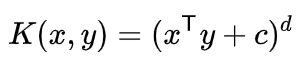

In [344]:
df['X1_Square']=df['X1']**2
df['X2_Square']=df['X2']**2
df['X1*X2']=df['X1']*df['X2']
df.head()

X1        X2  Y  X1_Square  X2_Square     X1*X2
0 -0.395861  0.118082  0   0.156706   0.013943 -0.046744
1  0.379303  0.727106  0   0.143871   0.528683  0.275794
2 -0.576872  0.087715  0   0.332781   0.007694 -0.050601
3  0.721483 -0.271026  0   0.520538   0.073455 -0.195540
4 -0.188109 -0.179384  0   0.035385   0.032179  0.033744

In [345]:
### Independent and Dependent features
X = df[['X1_Square','X2_Square','X1*X2']]
y = df['Y']

In [346]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25,random_state = 0)

In [347]:
X_train.head()

X1_Square  X2_Square     X1*X2
71    0.274679   3.544890 -0.986765
124   0.970999   0.074640  0.269213
184   0.326857   5.329830  1.319883
97    0.350918   1.237627 -0.659019
149  10.323068   8.142032 -9.167920

In [348]:
import matplotlib.pyplot as plt
%matplotlib inline

In [349]:
df.head()

X1        X2  Y  X1_Square  X2_Square     X1*X2
0 -0.395861  0.118082  0   0.156706   0.013943 -0.046744
1  0.379303  0.727106  0   0.143871   0.528683  0.275794
2 -0.576872  0.087715  0   0.332781   0.007694 -0.050601
3  0.721483 -0.271026  0   0.520538   0.073455 -0.195540
4 -0.188109 -0.179384  0   0.035385   0.032179  0.033744

In [350]:
import plotly.express as px
import plotly.express as px
fig = px.scatter_3d(df, x='X1_Square', y='X2_Square', z='X1*X2',color='Y')
fig.show()
plt.show()

In [351]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.44

**Radial Basis Function(rbf) Kernel**

In [352]:
df.head()

X1        X2  Y  X1_Square  X2_Square     X1*X2
0 -0.395861  0.118082  0   0.156706   0.013943 -0.046744
1  0.379303  0.727106  0   0.143871   0.528683  0.275794
2 -0.576872  0.087715  0   0.332781   0.007694 -0.050601
3  0.721483 -0.271026  0   0.520538   0.073455 -0.195540
4 -0.188109 -0.179384  0   0.035385   0.032179  0.033744

In [353]:
## Indpeendent Features
X=df.iloc[:,0:2]
y=df.Y

In [354]:
X.head()

X1        X2
0 -0.395861  0.118082
1  0.379303  0.727106
2 -0.576872  0.087715
3  0.721483 -0.271026
4 -0.188109 -0.179384

In [355]:
y

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: Y, Length: 200, dtype: int64

In [356]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    random_state = 0)

In [357]:
classifier = SVC(kernel="rbf")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.52

In [358]:
classifier = SVC(kernel="poly")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.46

**Sigmoid**

In [359]:
classifier = SVC(kernel="sigmoid")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.52

# Naive Baye's Algorithm (Classification)

In [360]:
from sklearn.datasets import load_iris

In [361]:
from sklearn.model_selection import train_test_split

In [362]:
X,y=load_iris(return_X_y=True)

In [363]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [364]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [365]:
X_train

array([[5. , 2. , 3.5, 1. ],
       [6.5, 3. , 5.5, 1.8],
       [6.7, 3.3, 5.7, 2.5],
       [6. , 2.2, 5. , 1.5],
       [6.7, 2.5, 5.8, 1.8],
       [5.6, 2.5, 3.9, 1.1],
       [7.7, 3. , 6.1, 2.3],
       [6.3, 3.3, 4.7, 1.6],
       [5.5, 2.4, 3.8, 1.1],
       [6.3, 2.7, 4.9, 1.8],
       [6.3, 2.8, 5.1, 1.5],
       [4.9, 2.5, 4.5, 1.7],
       [6.3, 2.5, 5. , 1.9],
       [7. , 3.2, 4.7, 1.4],
       [6.5, 3. , 5.2, 2. ],
       [6. , 3.4, 4.5, 1.6],
       [4.8, 3.1, 1.6, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [5.6, 2.7, 4.2, 1.3],
       [5.6, 2.9, 3.6, 1.3],
       [5.5, 2.5, 4. , 1.3],
       [6.1, 3. , 4.6, 1.4],
       [7.2, 3.2, 6. , 1.8],
       [5.3, 3.7, 1.5, 0.2],
       [4.3, 3. , 1.1, 0.1],
       [6.4, 2.7, 5.3, 1.9],
       [5.7, 3. , 4.2, 1.2],
       [5.4, 3.4, 1.7, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.9, 3.1, 4.9, 1.5],
       [4.6, 3.1, 1.5, 0.2],
       [5.9, 3. , 5.1, 1.8],
       [5.1, 2.5, 3. , 1.1],
       [4.6, 3.4, 1.4, 0.3],
       [6.2, 2

In [366]:
from sklearn.naive_bayes import GaussianNB

In [367]:
gnb=GaussianNB()

In [368]:
gnb.fit(X_train,y_train)

GaussianNB()

In [369]:
y_pred=gnb.predict(X_test)

In [370]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [371]:
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [372]:
import seaborn as sns

In [373]:
sns.load_dataset('tips')

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

# RandomForest Classifier Implementation With Pipelines & Hyperparameter Tuning

In [374]:
import seaborn as sns
df=sns.load_dataset('tips')
df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [375]:
df['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [376]:
df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [377]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [378]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['time']=encoder.fit_transform(df['time'])

In [379]:
df['time'].value_counts()

time
0    176
1     68
Name: count, dtype: int64

In [380]:
## independent and dependent features
X=df.drop(labels=['time'],axis=1)
y=df['time']

In [381]:
X.head()

total_bill   tip     sex smoker  day  size
0       16.99  1.01  Female     No  Sun     2
1       10.34  1.66    Male     No  Sun     3
2       21.01  3.50    Male     No  Sun     3
3       23.68  3.31    Male     No  Sun     2
4       24.59  3.61  Female     No  Sun     4

In [382]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [383]:
X_train.head()

total_bill   tip   sex smoker   day  size
228       13.28  2.72  Male     No   Sat     2
208       24.27  2.03  Male    Yes   Sat     2
96        27.28  4.00  Male    Yes   Fri     2
167       31.71  4.50  Male     No   Sun     4
84        15.98  2.03  Male     No  Thur     2

In [384]:
from sklearn.impute import SimpleImputer ## Handling Missing Values
from sklearn.preprocessing import OneHotEncoder## handling Categorical features
from sklearn.preprocessing import StandardScaler## Feature scaling
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
## Automating the entire

In [385]:
categorical_cols = ['sex', 'smoker','day']
numerical_cols = ['total_bill', 'tip','size']

In [386]:
## Feature Engineering Automation
num_pipeline=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='median')), ##missing values
        ('scaler',StandardScaler())## feature scaling 
    ]

)

#categorical Pipeline
cat_pipeline=Pipeline(
                steps=[
                ('imputer',SimpleImputer(strategy='most_frequent')), ## handling Missing values
                ('onehotencoder',OneHotEncoder()) ## Categorical features to numerical
                ]

            )  

In [387]:
preprocessor=ColumnTransformer([
    ('num_pipeline',num_pipeline,numerical_cols),
    ('cat_pipeline',cat_pipeline,categorical_cols)

])

In [388]:
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

In [389]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

In [390]:
## Automate Model Training Process
models={
    'Random Forest':RandomForestClassifier(),
    'Decision Tree':DecisionTreeClassifier(),
    'SVC':SVC(),
    'gnb':GaussianNB(),
    'bnb':BernoulliNB()


}

In [391]:
from sklearn.metrics import accuracy_score

In [392]:
def evaluate_model(X_train,y_train,X_test,y_test,models):
    
    report = {}
    for i in range(len(models)):
        model = list(models.values())[i]
        # Train model
        model.fit(X_train,y_train)

            

        # Predict Testing data
        y_test_pred =model.predict(X_test)

        # Get accuracy for test data prediction
       
        test_model_score = accuracy_score(y_test,y_test_pred)

        report[list(models.keys())[i]] =  test_model_score
            

            
    return report

In [393]:
evaluate_model(X_train,y_train,X_test,y_test,models)

{'Random Forest': 0.9591836734693877,
 'Decision Tree': 0.9387755102040817,
 'SVC': 0.9591836734693877,
 'gnb': 0.9591836734693877,
 'bnb': 0.9795918367346939}

In [394]:
classifier=RandomForestClassifier()

In [395]:
## Hypeparameter Tuning
params={'max_depth':[3,5,10,None],
              'n_estimators':[100,200,300],
               'criterion':['gini','entropy']
              }

In [396]:
from sklearn.model_selection import RandomizedSearchCV

In [397]:
cv=RandomizedSearchCV(classifier,param_distributions=params,scoring='accuracy',cv=5,verbose=3)
cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=gini, max_depth=10, n_estimators=200;, score=0.974 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=10, n_estimators=200;, score=0.923 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=10, n_estimators=200;, score=1.000 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=10, n_estimators=200;, score=0.949 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=10, n_estimators=200;, score=0.923 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=5, n_estimators=200;, score=0.974 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=5, n_estimators=200;, score=0.923 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=5, n_estimators=200;, score=0.974 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=5, n_estimators=200;, score=0.923 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=5, n_estimators=200;, score=0.949 total time=   0.2s
[CV 1/5] END c

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy', verbose=3)

In [398]:
cv.best_params_

{'n_estimators': 200, 'max_depth': 10, 'criterion': 'gini'}

### Boosting Techniques:

# Adaboost,Gradient Boost ,XGboost Implementation

**Classification**

In [399]:
!pip install Xgboost

In [400]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,n_informative=2,n_redundant=0,random_state=0, shuffle=False)

In [401]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [402]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xb

In [403]:
classifier1=AdaBoostClassifier()
classifier1.fit(X_train,y_train)

AdaBoostClassifier()

In [404]:
y_pred1=classifier1.predict(X_test)

In [405]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [406]:
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[153  13]
 [ 12 152]]
0.9242424242424242
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       166
           1       0.92      0.93      0.92       164

    accuracy                           0.92       330
   macro avg       0.92      0.92      0.92       330
weighted avg       0.92      0.92      0.92       330



In [407]:
classifier2=GradientBoostingClassifier()
classifier2.fit(X_train,y_train)

GradientBoostingClassifier()

In [408]:
y_pred2=classifier2.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[153  13]
 [  8 156]]
0.9363636363636364
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       166
           1       0.92      0.95      0.94       164

    accuracy                           0.94       330
   macro avg       0.94      0.94      0.94       330
weighted avg       0.94      0.94      0.94       330



In [409]:
classifier3=xb.XGBClassifier()
classifier3.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [410]:
y_pred3=classifier3.predict(X_test)
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[155  11]
 [  9 155]]
0.9393939393939394
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       166
           1       0.93      0.95      0.94       164

    accuracy                           0.94       330
   macro avg       0.94      0.94      0.94       330
weighted avg       0.94      0.94      0.94       330



**Regression**

In [411]:
from sklearn.datasets import make_regression
X, y = make_regression(n_features=4, n_informative=2,random_state=0, shuffle=False)

In [412]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [413]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xb

In [414]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Initialize the regressors
ada_boost_regressor = AdaBoostRegressor(random_state=42)
gradient_boosting_regressor = GradientBoostingRegressor(random_state=42)
xgb_regressor = XGBRegressor(random_state=42)

# Train the regressors
ada_boost_regressor.fit(X_train, y_train)
gradient_boosting_regressor.fit(X_train, y_train)
xgb_regressor.fit(X_train, y_train)

# Predict using the trained models
y_pred_ada = ada_boost_regressor.predict(X_test)
y_pred_gradient = gradient_boosting_regressor.predict(X_test)
y_pred_xgb = xgb_regressor.predict(X_test)

# Calculate the R^2 scores
r2_ada = r2_score(y_test, y_pred_ada)
r2_gradient = r2_score(y_test, y_pred_gradient)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"AdaBoostRegressor R2: {r2_ada}")
print(f"GradientBoostingRegressor R2: {r2_gradient}")
print(f"XGBRegressor R2: {r2_xgb}")


AdaBoostRegressor R2: 0.924612988334747
GradientBoostingRegressor R2: 0.9377840833647415
XGBRegressor R2: 0.9109910707496999


In [415]:
xb.XGBRegressor()

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# PCA

In [416]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

In [417]:
from sklearn.datasets import load_breast_cancer

In [418]:
cancer_dataset=load_breast_cancer()

In [419]:
cancer_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [420]:
cancer_dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [421]:
print(cancer_dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [422]:
df=pd.DataFrame(cancer_dataset['data'],columns=cancer_dataset['feature_names'])
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  radius error  texture error  perimeter error  \
0                 0.07871        1.0950         0.9053            8.589   
1                 0.05667        0.5435         0.7339            3.398   
2                 0.05999        0.7456         0.7869            4.585   
3                 0.09744        0.4956         1.1560            3.445   
4                 0.05883        0.7572         0.7813            5.438   

   area error  smoothness error  compactness error  concavity error  \
0      153.40          0.006399            0.04904          0.05373   
1       74.08          0.005225            0.01308          0.01860   
2       94.03          0.006150            0.04006          0.03832   
3       27.23          0.009110            0.07458          0.05661   
4       94.44          0.011490            0.02461          0.05688   

   concave points error  symmetry error  fractal dimension error  \
0               0.01587         0.03003                 0.006193   
1               0.01340         0.01389                 0.003532   
2               0.02058         0.02250                 0.004571   
3               0.01867         0.05963                 0.009208   
4               0.01885         0.01756                 0.005115   

   worst radius  worst texture  worst perimeter  worst area  worst smoothness  \
0         25.38          17.33           184.60      2019.0            0.1622   
1         24.99          23.41           158.80      1956.0            0.1238   
2         23.57          25.53           152.50      1709.0            0.1444   
3         14.91          26.50            98.87       567.7            0.2098   
4         22.54          16.67           152.20      1575.0            0.1374   

   worst compactness  worst concavity  worst concave points  worst symmetry  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   worst fractal dimension  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678

In [423]:
## Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [424]:
scaler.fit(df)

StandardScaler()

In [425]:
scaled_data=scaler.transform(df)

In [426]:
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [427]:
from sklearn.decomposition import PCA

In [428]:
pca=PCA(n_components=2)

In [429]:
data_pca=pca.fit_transform(scaled_data)

In [430]:
data_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [431]:
pca.explained_variance_

array([13.30499079,  5.7013746 ])

Text(0, 0.5, 'Second Principal Component')

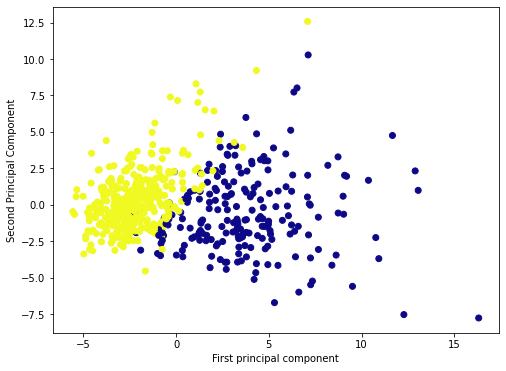

In [432]:
plt.figure(figsize=(8,6))
plt.scatter(data_pca[:,0],data_pca[:,1],c=cancer_dataset['target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

## PCA Implementation With Python

In [433]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn import datasets

In [434]:
dataset=datasets.load_iris()

In [435]:
X=dataset['data']
y=dataset['target']

In [436]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [437]:
X_train

array([[5.7, 2.9, 4.2, 1.3],
       [7.6, 3. , 6.6, 2.1],
       [5.6, 3. , 4.5, 1.5],
       [5.1, 3.5, 1.4, 0.2],
       [7.7, 2.8, 6.7, 2. ],
       [5.8, 2.7, 4.1, 1. ],
       [5.2, 3.4, 1.4, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5.1, 3.8, 1.9, 0.4],
       [5. , 2. , 3.5, 1. ],
       [6.3, 2.7, 4.9, 1.8],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [5.6, 2.7, 4.2, 1.3],
       [5.1, 3.4, 1.5, 0.2],
       [5.7, 3. , 4.2, 1.2],
       [7.7, 3.8, 6.7, 2.2],
       [4.6, 3.2, 1.4, 0.2],
       [6.2, 2.9, 4.3, 1.3],
       [5.7, 2.5, 5. , 2. ],
       [5.5, 4.2, 1.4, 0.2],
       [6. , 3. , 4.8, 1.8],
       [5.8, 2.7, 5.1, 1.9],
       [6. , 2.2, 4. , 1. ],
       [5.4, 3. , 4.5, 1.5],
       [6.2, 3.4, 5.4, 2.3],
       [5.5, 2.3, 4. , 1.3],
       [5.4, 3.9, 1.7, 0.4],
       [5. , 2.3, 3.3, 1. ],
       [6.4, 2.7, 5.3, 1.9],
       [5. , 3.3, 1.4, 0.2],
       [5. , 3.2, 1.2, 0.2],
       [5.5, 2.4, 3.8, 1.1],
       [6.7, 3

In [438]:
## PCA- Transformation
pca=PCA(n_components=3)
pca

PCA(n_components=3)

In [439]:
X_train=pca.fit_transform(X_train)
X_train

array([[ 3.22902397e-01, -2.37270677e-01,  5.67385995e-02],
       [ 3.35552035e+00,  5.83049683e-01, -3.28026023e-01],
       [ 6.06909989e-01, -3.15971948e-01,  3.00676488e-01],
       [-2.72817511e+00,  4.27577132e-01,  1.15313718e-03],
       [ 3.45649511e+00,  5.05276379e-01, -5.58623842e-01],
       [ 1.81648425e-01, -2.53524117e-01, -2.95111131e-01],
       [-2.68432386e+00,  4.26081277e-01, -1.16106065e-01],
       [-2.81519461e+00,  3.65984714e-01,  1.04618538e-01],
       [-2.24998893e+00,  5.19074070e-01,  3.29384000e-01],
       [-5.78277826e-01, -1.17473663e+00, -3.43091299e-01],
       [ 1.33493144e+00, -1.58668543e-01, -7.85684488e-02],
       [-2.40366776e+00,  5.99469498e-02,  1.25799777e-01],
       [-2.55890034e+00, -2.63787007e-02, -2.52131368e-01],
       [-2.35087676e+00,  1.95931613e-01,  5.58985862e-02],
       [ 2.99984039e-01, -4.44823406e-01, -1.67008263e-02],
       [-2.63556736e+00,  3.39217011e-01, -5.69862980e-02],
       [ 2.80440519e-01, -1.55505144e-01

In [440]:
X_test=pca.transform(X_test)
X_test

array([[ 8.70040853e-01, -1.15509142e-01, -2.49664892e-01],
       [-2.23549168e+00,  9.77633301e-01, -5.88266880e-02],
       [ 3.74816334e+00,  2.92308120e-01, -5.09305167e-01],
       [ 7.61382105e-01, -1.12906783e-01,  2.23383067e-02],
       [ 1.28475481e+00,  3.18957299e-01, -5.09690705e-01],
       [-2.45397801e+00,  5.19612686e-01, -1.07666913e-01],
       [-2.27751928e-01, -1.93394122e-01,  7.78709474e-02],
       [ 1.87694410e+00,  4.31417060e-01,  1.40387888e-01],
       [ 8.83972768e-01, -4.64312798e-01, -5.30011145e-01],
       [ 8.13566829e-02, -2.40334940e-01, -1.95566316e-01],
       [ 1.61601925e+00,  2.64599911e-01,  2.53128524e-01],
       [-2.83939206e+00, -1.13315521e-01, -2.10798113e-01],
       [-2.66631075e+00,  7.19002418e-01, -2.19045609e-01],
       [-2.72386596e+00,  5.87708626e-03, -1.95498122e-01],
       [-2.62799364e+00,  6.05865783e-01,  2.52477721e-01],
       [ 1.05083692e+00,  3.20948488e-01,  1.81576895e-01],
       [ 2.30035383e+00, -2.96719778e-02

In [441]:
pca.components_

array([[ 0.36873621, -0.06977632,  0.85630117,  0.35484246],
       [ 0.68187006,  0.69682861, -0.1867726 , -0.12082672],
       [-0.53692993,  0.63566209,  0.05426774,  0.55199182]])

In [442]:
pca.explained_variance_ratio_

array([0.9201008 , 0.05494812, 0.01978256])

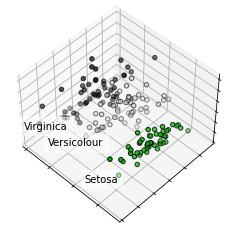

In [443]:
#Code source: Gaël Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt


from sklearn import decomposition
from sklearn import datasets

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])


plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()

# Unsupervised Learning

# K-Means Clustering Algorithms Implementation

In [444]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [445]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

In [446]:
X

array([[-5.37039106,  3.47555168],
       [ 5.84161203, -3.98182959],
       [ 1.76127766,  9.39696306],
       ...,
       [ 6.14147823, -5.75491603],
       [-5.45330839,  1.75599573],
       [-0.21966953,  8.72922042]])

In [447]:
y

array([2, 1, 0, 2, 1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 1, 2, 2, 2, 1, 1, 0, 1,
       2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 1, 2, 1, 0, 1, 2, 2, 1, 0, 1, 1, 2,
       2, 1, 0, 2, 1, 1, 2, 2, 1, 2, 0, 2, 0, 2, 2, 2, 1, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 1, 2, 2, 0, 1, 2,
       1, 2, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1,
       0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 0, 2, 1,
       0, 0, 2, 1, 1, 2, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0,
       1, 1, 1, 1, 2, 1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 2,
       0, 0, 2, 1, 1, 2, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0,
       2, 2, 2, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 2, 0, 1, 1, 0, 0, 1,
       1, 2, 0, 2, 0, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 2, 1, 2, 1, 0, 2, 0, 0, 2, 2, 0, 1, 0, 1, 1, 2, 1, 0, 0,
       1, 0, 0, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2, 2, 0,
       0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 2, 2, 1, 1, 1,

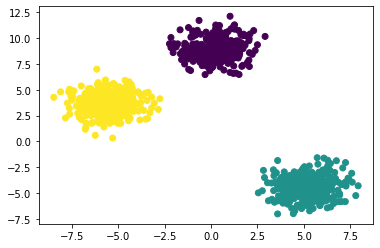

In [448]:
plt.scatter(X[:,0],X[:,1],c=y)

In [449]:
from sklearn.model_selection import train_test_split

In [450]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [451]:
from sklearn.cluster import KMeans

In [452]:
## Elbow method to select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [453]:
wcss

[34827.57682552022,
 7935.437286145416,
 1319.2730531585607,
 1172.1089426908152,
 1049.4418945749596,
 857.868617851633,
 793.8081717429527,
 677.6595083384582,
 629.4585750813467,
 555.747133575838]

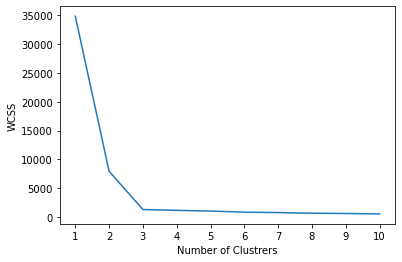

In [454]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [455]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [456]:
y_labels=kmeans.fit_predict(X_train)

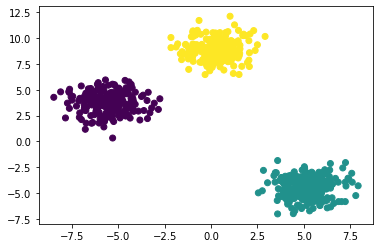

In [457]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [458]:
## knee locator
!pip install kneed

In [459]:
from kneed import KneeLocator

In [460]:
k1=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
k1.elbow

3

In [461]:
## Silhoutte score
from sklearn.metrics import silhouette_score

In [462]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

In [463]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.6513472536551298,
 0.4740990857363852,
 0.3391273668308371,
 0.3484177390607832,
 0.31406320840109997,
 0.3360296713507784]

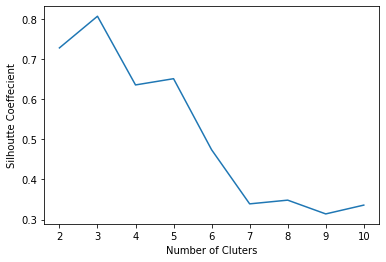

In [464]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()

# Hierarichal Clustering Implementation

In [465]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [466]:
## Import IRIS dataset
iris=datasets.load_iris()

In [467]:
iris_data=pd.DataFrame(iris.data)

In [468]:
iris_data.columns=iris.feature_names

In [469]:
iris_data

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

In [470]:
## Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [471]:
X_scaled=scaler.fit_transform(iris_data)

In [472]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [473]:
X_scaled.shape

(150, 4)

In [474]:
## Apply the PCA
from sklearn.decomposition import PCA

In [475]:
pca=PCA(n_components=2)

In [476]:
pca_scaled=pca.fit_transform(X_scaled)

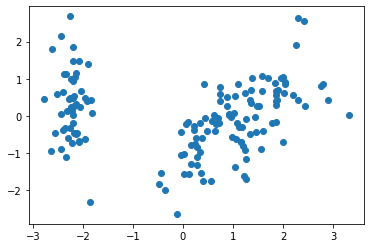

In [477]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1])

Text(0, 0.5, 'Eucledian Distance')

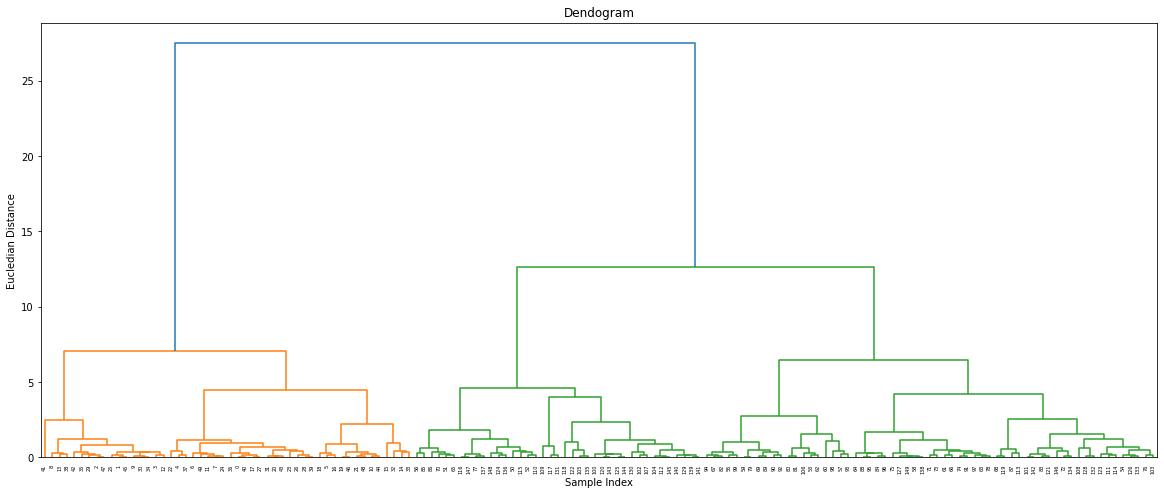

In [478]:
## Agglomerative Clustering
## To construct a dendogram
import scipy.cluster.hierarchy as sc
##plot the dendogram
plt.figure(figsize=(20,8))
plt.title("Dendograms")

## create dendogram
sc.dendrogram(sc.linkage(pca_scaled,method='ward'))
plt.title('Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Eucledian Distance')

In [479]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward')
cluster.fit(pca_scaled)

AgglomerativeClustering()

In [480]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

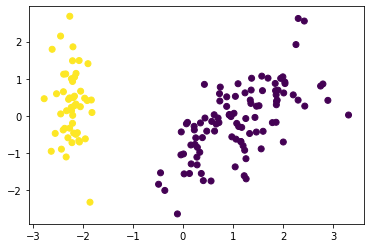

In [481]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)

In [482]:
## silhouette score
from sklearn.metrics import silhouette_score

In [483]:
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    agglo = AgglomerativeClustering(n_clusters=k,metric='euclidean',linkage='ward')
    agglo.fit(X_scaled)
    score = silhouette_score(X_scaled, agglo.labels_)
    silhouette_coefficients.append(score)

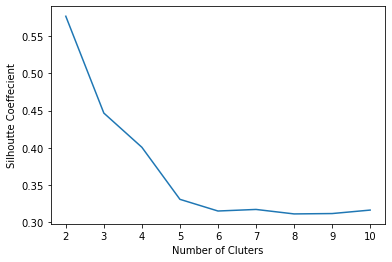

In [484]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()

# DBSCAN Clutering

In [485]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline

In [486]:
X,y=make_moons(n_samples=250,noise=0.10)

In [487]:
X

array([[ 2.06778997,  0.35637599],
       [ 0.22644733, -0.11996784],
       [ 0.03829525,  0.16949422],
       [-0.1783078 ,  1.06403911],
       [ 0.8964628 , -0.04026443],
       [ 0.5372356 ,  0.86222058],
       [ 0.49840478, -0.5700095 ],
       [ 0.34139001, -0.39431152],
       [ 1.00974203,  0.42972799],
       [-0.60669418,  0.87999885],
       [-0.85650859,  0.64067979],
       [-0.75713892,  0.58109539],
       [ 0.45257542, -0.13911151],
       [ 1.79674156,  0.02722801],
       [ 0.21625554,  0.92451004],
       [-0.68451107,  0.64993883],
       [-0.91845302,  0.03636968],
       [-1.01628196,  0.06956508],
       [ 1.14346597, -0.52996681],
       [ 1.14408592,  0.4239115 ],
       [ 0.21131733,  0.28438234],
       [ 0.59485897, -0.59764334],
       [-0.66558107,  0.73140006],
       [-0.39858611,  0.84337751],
       [-0.89721247,  0.0182601 ],
       [-0.270979  ,  1.12666384],
       [ 0.68692528,  0.67615151],
       [ 0.10126786,  0.17895485],
       [ 1.9420084 ,

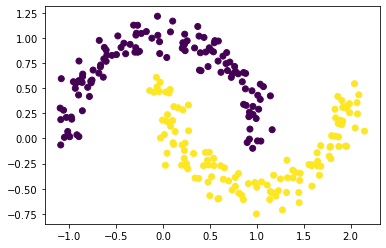

In [488]:
plt.scatter(X[:,0],X[:,1],c=y)

In [489]:
##feature scaling(Standard Scaling)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [490]:
X_scaled=scaler.fit_transform(X)

In [491]:
dbcan=DBSCAN(eps=0.3)

In [492]:
dbcan.fit(X_scaled)

DBSCAN(eps=0.3)

In [493]:
dbcan.labels_

array([ 0,  0,  0,  1,  1,  1,  0,  0,  1,  1,  1,  1,  0,  0,  1,  1,  1,
        1,  0,  1,  0,  0,  1,  1,  1,  1,  1,  0,  0,  1,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  1,  1,  1,  1,  0,  1,  1,  0,  0,  0,  1,  1,
        0,  1,  0,  1,  1,  0,  0,  0,  1,  1,  0,  0,  0,  1,  0,  1,  0,
        1,  1,  0,  1,  0,  0,  1,  0,  0,  1,  0,  1,  0,  1,  0,  1,  1,
        1,  0,  1,  0,  1,  1,  1,  1,  0,  0,  1,  0,  1,  0,  1,  0,  1,
        0,  0,  1,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  1,  1,
        1,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,
        0,  1,  0,  0,  0,  1,  1,  0,  0,  1,  0,  0,  1,  1,  1,  0,  0,
        0,  0,  1,  1,  1,  1,  0,  1,  0,  1,  0,  1,  1,  1,  0,  0,  0,
        0,  0,  1,  0,  0,  0,  1,  1,  1,  0,  1,  1,  1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  1,  0,  1,  1,  1,  0,  1,  1,  0,  0,  0,
        1,  0,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  0,  1,  0

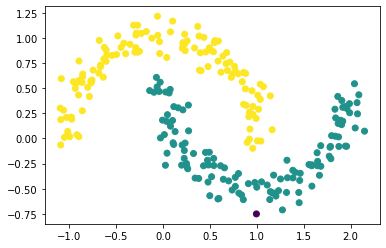

In [494]:
plt.scatter(X[:,0],X[:,1],c=dbcan.labels_)

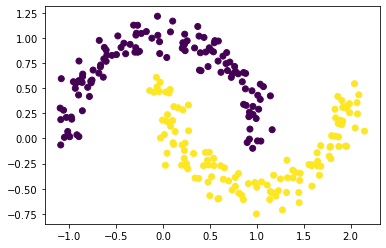

In [495]:
plt.scatter(X[:,0],X[:,1],c=y)

In [496]:
#Time - series forecasting using FbProphet!!

#https://github.com/krishnaik06/FbProphet/blob/master/Untitled.ipynb

# PyCaret Library 

In [497]:
import numpy as np
import pandas as pd
data = pd.read_csv("titanic_train.csv")
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S